In [59]:
!pip install xgboost
!pip install imbalanced-learn


import numpy as np
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, recall_score, make_scorer


In [27]:

df = pd.read_parquet('/content/target2_data.parquet')

display(df.head())

,Price,Positive,Negative,Achievements,Average playtime forever,release_year,release_month,release_quarter,game_age_years,release_season,...,tag_3D,tag_Pixel_Graphics,tag_Early_Access,tag_Colorful,tag_Story_Rich,tag_Cute,tag_Arcade,tag_Exploration,tag_Other,target
0,19.99,1.945910,2.484907,3,0,2008,10,4,17,3,...,0,0,0,0,0,0,0,0,1,0
1,0.99,3.988984,1.791759,2,0,2017,10,4,8,3,...,0,1,0,0,0,0,1,0,0,0
2,5.99,1.386294,0.000000,0,0,2020,7,3,5,2,...,0,0,0,0,0,0,0,0,0,0
3,0.00,3.931826,2.197225,2,0,2020,2,1,5,0,...,0,0,0,0,1,0,0,0,0,0
4,0.00,4.477337,3.912023,0,0,2021,2,1,4,0,...,0,0,0,0,0,0,0,1,0,2


In [28]:
x = df.drop(columns=['target'])
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state=42)

In [29]:
dt = xgb.XGBClassifier()
model = dt.fit(x_train,y_train)
model.score(x_test,y_test)

0.8391927083333334

In [30]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

print("\nx_train head:")
display(x_train.head())

print("\nx_test head:")
display(x_test.head())

print("\ny_train head:")
display(y_train.head())

print("\ny_test head:")
display(y_test.head())

x_train shape: (55288, 41)
y_train shape: (55288,)
x_test shape: (6144, 41)
y_test shape: (6144,)

x_train head:


,Price,Positive,Negative,Achievements,Average playtime forever,release_year,release_month,release_quarter,game_age_years,release_season,...,tag_Atmospheric,tag_3D,tag_Pixel_Graphics,tag_Early_Access,tag_Colorful,tag_Story_Rich,tag_Cute,tag_Arcade,tag_Exploration,tag_Other
35376,3.99,1.098612,0.000000,0,0,2022,5,2,3,1,...,0,0,0,0,0,0,1,0,0,0
35223,9.99,3.091042,0.693147,0,0,2019,8,3,6,2,...,0,0,1,0,0,1,0,0,0,0
12542,3.99,2.944439,3.367296,0,0,2018,7,3,7,2,...,0,0,0,0,0,0,0,0,0,0
11459,19.99,2.302585,1.945910,0,0,2022,6,2,3,2,...,0,1,0,1,0,0,0,0,0,0
26216,4.99,2.564949,2.079442,0,0,2020,10,4,5,3,...,0,1,0,0,0,0,0,0,0,0



x_test head:


,Price,Positive,Negative,Achievements,Average playtime forever,release_year,release_month,release_quarter,game_age_years,release_season,...,tag_Atmospheric,tag_3D,tag_Pixel_Graphics,tag_Early_Access,tag_Colorful,tag_Story_Rich,tag_Cute,tag_Arcade,tag_Exploration,tag_Other
26611,14.99,4.304065,3.178054,3,0,2020,3,1,5,1,...,1,0,0,0,0,1,1,0,0,0
27806,0.99,2.397895,1.791759,1,0,2019,12,4,6,0,...,1,0,0,0,0,0,0,0,0,0
49740,14.99,6.306275,4.574711,0,1,2015,3,1,10,1,...,0,0,0,0,0,0,0,0,0,1
9069,9.99,5.241747,4.736198,0,0,2013,11,4,12,3,...,0,0,0,0,0,0,0,0,0,0
6196,29.99,3.610918,2.079442,0,0,2018,2,1,7,0,...,0,0,0,0,0,0,0,0,0,1



y_train head:


,target
35376,0
35223,0
12542,0
11459,0
26216,0



y_test head:


,target
26611,0
27806,0
49740,1
9069,2
6196,0


In [31]:
df = pd.read_parquet('/content/target2_data.parquet')
# Display the first 5 rows of the DataFrame
display(df.head())

,Price,Positive,Negative,Achievements,Average playtime forever,release_year,release_month,release_quarter,game_age_years,release_season,...,tag_3D,tag_Pixel_Graphics,tag_Early_Access,tag_Colorful,tag_Story_Rich,tag_Cute,tag_Arcade,tag_Exploration,tag_Other,target
0,19.99,1.945910,2.484907,3,0,2008,10,4,17,3,...,0,0,0,0,0,0,0,0,1,0
1,0.99,3.988984,1.791759,2,0,2017,10,4,8,3,...,0,1,0,0,0,0,1,0,0,0
2,5.99,1.386294,0.000000,0,0,2020,7,3,5,2,...,0,0,0,0,0,0,0,0,0,0
3,0.00,3.931826,2.197225,2,0,2020,2,1,5,0,...,0,0,0,0,1,0,0,0,0,0
4,0.00,4.477337,3.912023,0,0,2021,2,1,4,0,...,0,0,0,0,0,0,0,1,0,2


In [32]:
print("Sınıf dağılımı (y_train):")
display(y_train.value_counts())

from sklearn.utils.class_weight import compute_class_weight

# Sınıf ağırlıklarını hesapla
classes = np.unique(y_train)
class_weights_array = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)

# Ağırlıkları bir sözlüğe dönüştür
class_weight_dict = dict(zip(classes, class_weights_array))

print("\nHesaplanan sınıf ağırlıkları:")
display(class_weight_dict)

Sınıf dağılımı (y_train):


,count
target,
0,40601
2,7735
1,6952



Hesaplanan sınıf ağırlıkları:


{np.int64(0): np.float64(0.45391328620805727),
 np.int64(1): np.float64(2.650939777522056),
 np.int64(2): np.float64(2.3825899590605473)}

In [33]:

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

xgb_model = xgb.XGBClassifier(
    random_state=42,
    tree_method='hist',
    device='cuda',
    use_label_encoder=False,
    eval_metric='mlogloss'
)

print("XGBoost modeli GPU ayarlarıyla (hist/cuda) hazırlandı.")

# 3. Sınıf Ağırlıklarını Hesapla (Dengesiz veri seti için)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# Her bir örnek için ağırlık ataması
sample_weights_array = y_train.map(class_weight_dict)

# 4. RandomizedSearchCV Kurulumu
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    scoring='f1_weighted',
    verbose=2,
    n_jobs=1,
    random_state=42
)

print("RandomizedSearchCV başlıyor...")

# 5. Eğitimi Başlat
random_search.fit(x_train, y_train, sample_weight=sample_weights_array)

print("Eğitim başarıyla tamamlandı.")
print("En iyi parametreler:", random_search.best_params_)
print("En iyi skor:", random_search.best_score_)

XGBoost modeli GPU ayarlarıyla (hist/cuda) hazırlandı.
RandomizedSearchCV başlıyor...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   2.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   2.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   2.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   2.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   2.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_

En iyi model parametreleri: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 0.8}

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4498
           1       0.39      0.48      0.43       801
           2       0.75      0.69      0.72       845

    accuracy                           0.81      6144
   macro avg       0.68      0.68      0.68      6144
weighted avg       0.82      0.81      0.81      6144


Confusion Matrix:
[[4005  433   60]
 [ 286  382  133]
 [ 113  153  579]]


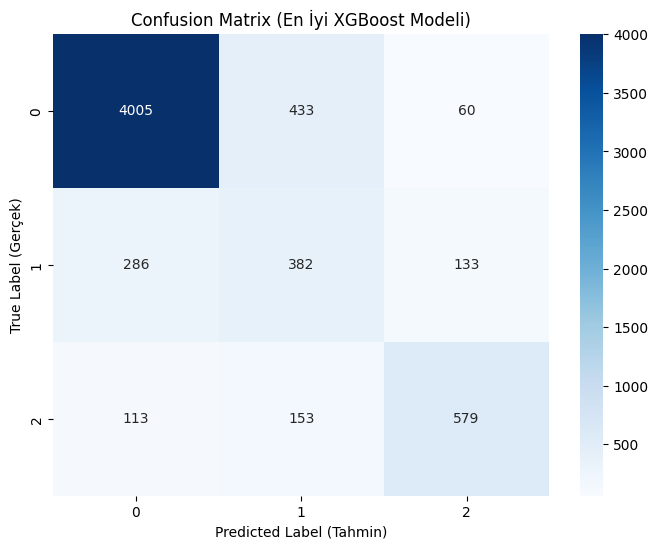

In [34]:

# 1. En iyi modeli RandomizedSearchCV içinden alıyoruz
best_model = random_search.best_estimator_

print("En iyi model parametreleri:", random_search.best_params_)

# 2. Test seti üzerinde tahmin yapıyoruz
y_pred = best_model.predict(x_test)

# 3. Classification Report oluştur ve yazdır
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 4. Confusion Matrix oluştur
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# 5. Görselleştirme (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)
plt.xlabel('Predicted Label (Tahmin)')
plt.ylabel('True Label (Gerçek)')
plt.title('Confusion Matrix (En İyi XGBoost Modeli)')
plt.show()

#Dengesiz oldukları içiin ağırlıklarını değiştirip deneyelim



Orijinal Ağırlıklar: {np.int64(0): np.float64(0.45391328620805727), np.int64(1): np.float64(2.650939777522056), np.int64(2): np.float64(2.3825899590605473)}
Güncellenmiş (Torpilli) Ağırlıklar: {np.int64(0): np.float64(0.45391328620805727), np.int64(1): np.float64(3.9764096662830837), np.int64(2): np.float64(2.3825899590605473)}

Yeni ayarlarla eğitim başlıyor...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   2.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   1.9s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   1.9s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7; total time=  

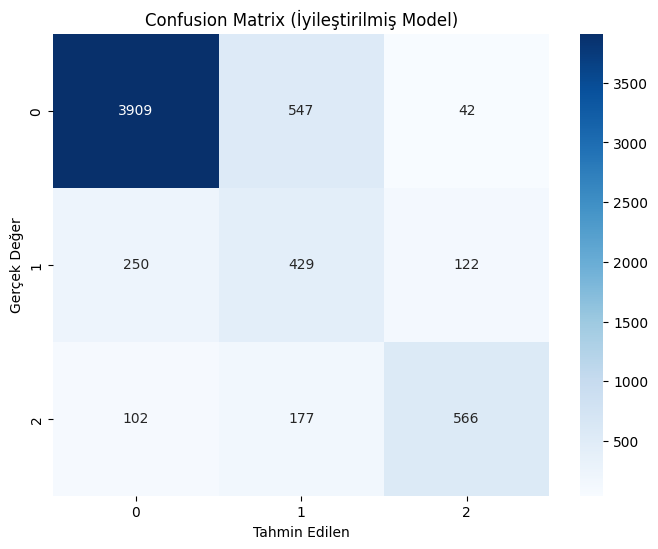

In [35]:

------
# Önce dengeli (balanced) ağırlıkları hesaplıyoruz
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

print("Orijinal Ağırlıklar:", class_weight_dict)

# Sınıf 1 (Arada kalanlar) modelin en çok karıştırdığı sınıf olduğu için onun ağırlını 1.5 yaptık
class_weight_dict[1] = class_weight_dict[1] * 1.5

print("Güncellenmiş (Torpilli) Ağırlıklar:", class_weight_dict)

sample_weights_array = y_train.map(class_weight_dict)

xgb_model = xgb.XGBClassifier(
    random_state=42,
    tree_method='hist',
    device='cuda',
    use_label_encoder=False,
    eval_metric='mlogloss',
    max_delta_step=1
)

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}


random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,
    cv=3,
    scoring='f1_weighted',
    verbose=2,
    n_jobs=1,
    random_state=42
)

print("\nYeni ayarlarla eğitim başlıyor...")
random_search.fit(x_train, y_train, sample_weight=sample_weights_array)

print("Eğitim tamamlandı.")
print("En iyi parametreler:", random_search.best_params_)


best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.title('Confusion Matrix (İyileştirilmiş Model)')
plt.show()

#Sınıf 1 ve 2 nin ağırlıklarını artıralım


Orijinal Dengeli Ağırlıklar: {np.int64(0): np.float64(0.45391328620805727), np.int64(1): np.float64(2.650939777522056), np.int64(2): np.float64(2.3825899590605473)}
Agresif Ağırlıklar: {np.int64(0): np.float64(0.45391328620805727), np.int64(1): np.float64(6.097161488300728), np.int64(2): np.float64(3.931273432449903)}
Dengesiz veri seti için optimize edilmiş eğitim başlıyor...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   1.9s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   1.9s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   1.9s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7

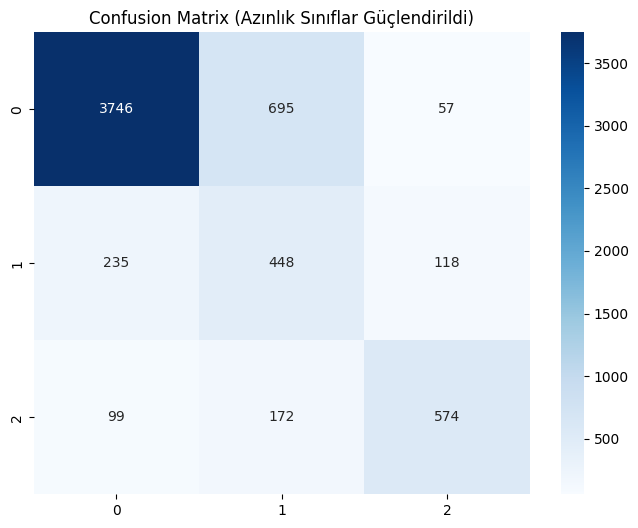

In [51]:
# 1. Temel Dengeli Ağırlıkları Hesapla
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

print("Orijinal Dengeli Ağırlıklar:", class_weight_dict)


# Sınıf 0 çok baskın olduğu için, Sınıf 1 ve 2'yi daha değerli yapalım.
class_weight_dict[1] = class_weight_dict[1] * 2.0  # Sınıf 1'i 2 kat güçlendir
class_weight_dict[2] = class_weight_dict[2] * 1.5  # Sınıf 2'yi 1.5 kat güçlendir


class_weight_dict[1] = class_weight_dict[1] * 1.15
class_weight_dict[2] = class_weight_dict[2] * 1.1
print("Agresif Ağırlıklar:", class_weight_dict)

sample_weights_array = y_train.map(class_weight_dict)

xgb_model = xgb.XGBClassifier(
    random_state=42,
    tree_method='hist',
    device='cuda',
    eval_metric='mlogloss',
    max_delta_step=1,
    # gamma=1
)

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}


random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,
    cv=3,
    scoring='f1_weighted',
    verbose=2,
    n_jobs=1,
    random_state=42
)

print("Dengesiz veri seti için optimize edilmiş eğitim başlıyor...")
random_search.fit(x_train, y_train, sample_weight=sample_weights_array)

# Sonuçları Göster
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)
plt.title('Confusion Matrix (Azınlık Sınıflar Güçlendirildi)')
plt.show()

#Ağırlıklar çok oldu biraz azaltalım
gereksiz bölünmeleri azaltalım gama 0.2 ayarlayalım

Dengeli Baz Ağırlıklar: {np.int64(0): np.float64(0.45391328620805727), np.int64(1): np.float64(2.650939777522056), np.int64(2): np.float64(2.3825899590605473)}
Revize Edilmiş Ağırlıklar: {np.int64(0): np.float64(0.45391328620805727), np.int64(1): np.float64(3.048580744150364), np.int64(2): np.float64(2.6208489549666023)}
Optimize edilmiş (Dengeli + Filtreli) eğitim başlıyor...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   2.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   2.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   1.9s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7

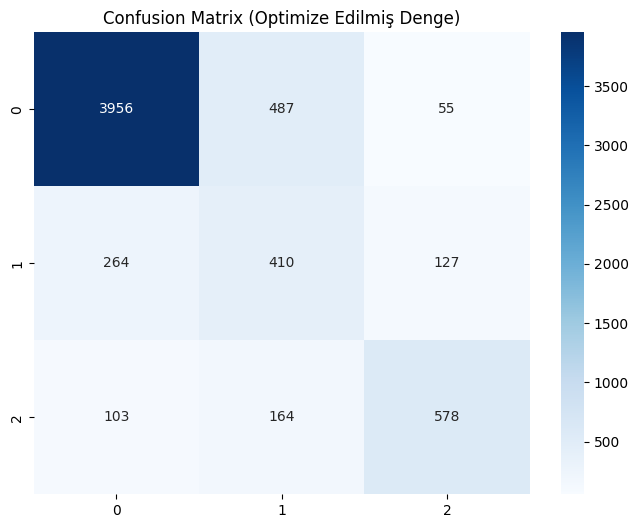

In [50]:

# 1. Ağırlıkları Normale Döndür
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

print("Dengeli Baz Ağırlıklar:", class_weight_dict)

# * 2.0 yapmıştık çok fazla oldu azaltalım.
class_weight_dict[1] = class_weight_dict[1] * 1.15
class_weight_dict[2] = class_weight_dict[2] * 1.1

print("Revize Edilmiş Ağırlıklar:", class_weight_dict)

sample_weights_array = y_train.map(class_weight_dict)

xgb_model = xgb.XGBClassifier(
    random_state=42,
    tree_method='hist',
    device='cuda',
    eval_metric='mlogloss',
    max_delta_step=1,     # Dengesizlik koruması
    min_child_weight=3,
    gamma=0.2
)

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,
    cv=3,
    scoring='f1_weighted',
    verbose=2,
    n_jobs=1,
    random_state=42
)

print("Optimize edilmiş (Dengeli + Filtreli) eğitim başlıyor...")
random_search.fit(x_train, y_train, sample_weight=sample_weights_array)

# Sonuçlar
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Görselleştirme
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)
plt.title('Confusion Matrix (Optimize Edilmiş Denge)')
plt.show()

#Yeterince skorlar iyileşmedi smote deneyelim yapay veri ekleyelim
'max_depth': [4, 6, 8,10],
    'min_child_weight' : [2,3,4,5],
    'gamma' : [0.1,0.2,0.3,0.4],
    bunları değiştirmem de pek etki etmedi

SMOTE öncesi eğitim seti boyutu: (55288, 41)
Sınıf dağılımı: [40601  6952  7735]
SMOTE sonrası eğitim seti boyutu: (121803, 41)
Yeni Sınıf dağılımı (Eşitlenmiş): [40601 40601 40601]

SMOTE ile eşitlenmiş veri üzerinde eğitim başlıyor...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=200, subsample=0.9; total time=   2.2s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=200, subsample=0.9; total time=   2.3s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=200, subsample=0.9; total time=   2.3s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=5, n_estimators=100, sub

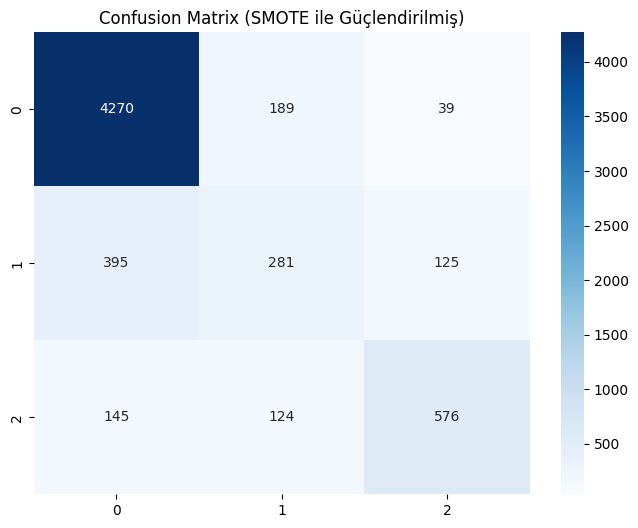

In [52]:
print("SMOTE öncesi eğitim seti boyutu:", x_train.shape)
print("Sınıf dağılımı:", np.bincount(y_train))

# 2. SMOTE Uyguluyoruz (Yapay Veri Üretimi)
# Bu işlem, azınlık sınıfları çoğaltarak Sınıf 0 sayısına eşitler.
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

print("SMOTE sonrası eğitim seti boyutu:", x_train_smote.shape)
print("Yeni Sınıf dağılımı (Eşitlenmiş):", np.bincount(y_train_smote))

#Weighte gerek kalmadı eşitledik
xgb_model = xgb.XGBClassifier(
    random_state=42,
    tree_method='hist',
    device='cuda',
    eval_metric='mlogloss',
    max_delta_step=1,
    # min_child_weight veya gamma'ya şimdilik dokunmayalım
)

param_grid = {
    'max_depth': [4, 6, 8,10],
    'min_child_weight' : [2,3,4,5],
    'gamma' : [0.1,0.2,0.3,0.4],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}


random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,
    cv=3,
    scoring='f1_weighted',
    verbose=2,
    n_jobs=1,
    random_state=42
)

print("\nSMOTE ile eşitlenmiş veri üzerinde eğitim başlıyor...")

random_search.fit(x_train_smote, y_train_smote)

# Sonuçlar
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Görselleştirme
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)
plt.title('Confusion Matrix (SMOTE ile Güçlendirilmiş)')
plt.show()

#Ağırlıkları değiştirmeyi deneyelim smote data üzerinden

SMOTE öncesi eğitim seti boyutu: (55288, 41)
Sınıf dağılımı: [40601  6952  7735]
SMOTE sonrası eğitim seti boyutu: (121803, 41)
Yeni Sınıf dağılımı (Eşitlenmiş): [40601 40601 40601]
Dengeli Baz Ağırlıklar: {np.int64(0): np.float64(0.45391328620805727), np.int64(1): np.float64(2.650939777522056), np.int64(2): np.float64(2.3825899590605473)}
Revize Edilmiş Ağırlıklar: {np.int64(0): np.float64(0.45391328620805727), np.int64(1): np.float64(5.301879555044112), np.int64(2): np.float64(2.3825899590605473)}

SMOTE ile eşitlenmiş veri üzerinde eğitim başlıyor...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=300, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=300, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=300, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, lea

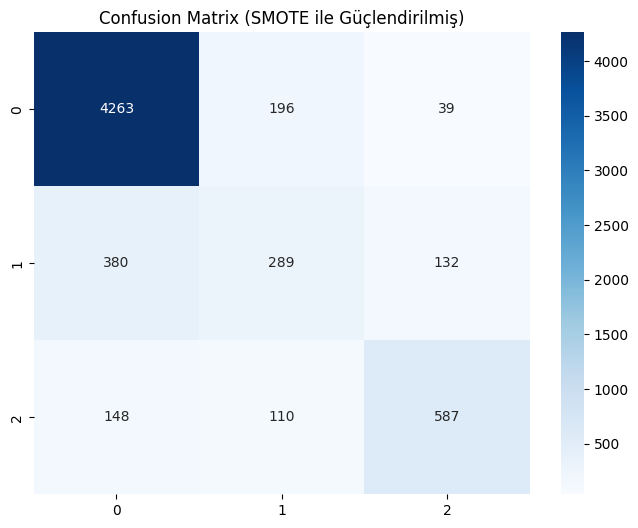

In [53]:


print("SMOTE öncesi eğitim seti boyutu:", x_train.shape)
print("Sınıf dağılımı:", np.bincount(y_train))

#Smote ile yapay veri ürettik
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

print("SMOTE sonrası eğitim seti boyutu:", x_train_smote.shape)
print("Yeni Sınıf dağılımı (Eşitlenmiş):", np.bincount(y_train_smote))


class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

print("Dengeli Baz Ağırlıklar:", class_weight_dict)

# * 2.0 yapmıştık, çok fazlaydı.
class_weight_dict[1] = class_weight_dict[1] * 2
#class_weight_dict[2] = class_weight_dict[2] * 1.1

print("Revize Edilmiş Ağırlıklar:", class_weight_dict)

sample_weights_array = y_train.map(class_weight_dict)

xgb_model = xgb.XGBClassifier(
    random_state=42,
    tree_method='hist',
    device='cuda',
    eval_metric='mlogloss',
    max_delta_step=1,     # Dengesizlik koruması
    min_child_weight=1,
    gamma=0.1             # overfit önleyelim
)


param_grid = {
    'max_depth': [4,6,8,10],
    'learning_rate': [0.01, 0.1, 0.2,0.3],
    'n_estimators': [100, 150, 200, 300,400],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}


random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,
    cv=3,
    scoring='f1_weighted',
    verbose=2,
    n_jobs=1,
    random_state=42
)

print("\nSMOTE ile eşitlenmiş veri üzerinde eğitim başlıyor...")

random_search.fit(x_train_smote, y_train_smote)

# Sonuçlar
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Görselleştirme
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)
plt.title('Confusion Matrix (SMOTE ile Güçlendirilmiş)')
plt.show()

#Yukarıdakinde Smote kullanarak yaptığımda daha kötü recall değeri buldum smote yöntemi işe yaramadı


SMOTE öncesi eğitim seti boyutu: (55288, 41)
Sınıf dağılımı: [40601  6952  7735]
Dengeli Baz Ağırlıklar: {np.int64(0): np.float64(0.45391328620805727), np.int64(1): np.float64(2.650939777522056), np.int64(2): np.float64(2.3825899590605473)}
Revize Edilmiş Ağırlıklar: {np.int64(0): np.float64(0.45391328620805727), np.int64(1): np.float64(5.301879555044112), np.int64(2): np.float64(2.3825899590605473)}
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=300, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=300, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=300, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=150, subsample=0.9; total time=   2.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estima

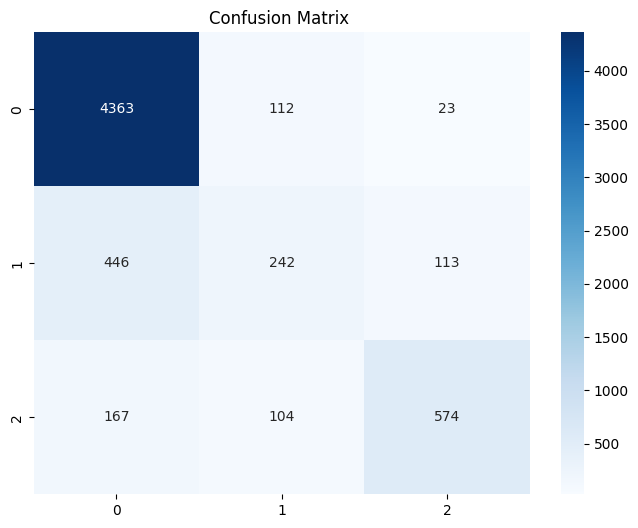

In [54]:


print("SMOTE öncesi eğitim seti boyutu:", x_train.shape)
print("Sınıf dağılımı:", np.bincount(y_train))

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

print("Dengeli Baz Ağırlıklar:", class_weight_dict)

class_weight_dict[1] = class_weight_dict[1] * 2
#class_weight_dict[2] = class_weight_dict[2] * 1.1

print("Revize Edilmiş Ağırlıklar:", class_weight_dict)

sample_weights_array = y_train.map(class_weight_dict)

xgb_model = xgb.XGBClassifier(
    random_state=42,
    tree_method='hist',
    device='cuda',
    eval_metric='mlogloss',
    max_delta_step=1,     # Dengesizlik koruması
    min_child_weight=1,
    gamma=0.1
)

param_grid = {
    'max_depth': [4,6,8,10],
    'learning_rate': [0.01, 0.1, 0.2,0.3],
    'n_estimators': [100, 150, 200, 300,400],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,
    cv=3,
    scoring='f1_weighted',
    verbose=2,
    n_jobs=1,
    random_state=42
)

random_search.fit(x_train, y_train)

best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Görselleştirme
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)
plt.title('Confusion Matrix ')
plt.show()

#smote olmadan ağırlıkları değiştirelim

Orijinal Ağırlıklar: {np.int64(0): np.float64(0.45391328620805727), np.int64(1): np.float64(2.650939777522056), np.int64(2): np.float64(2.3825899590605473)}
Güncellenmiş Ağırlıklar: {np.int64(0): np.float64(0.45391328620805727), np.int64(1): np.float64(3.9764096662830837), np.int64(2): np.float64(2.3825899590605473)}

Yeni ayarlarla eğitim başlıyor...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=150, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=150, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=150, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=6, n_estimators=500, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=6, n_estimators=500, subsample=0.8; total time=   2.4s
[CV] END c

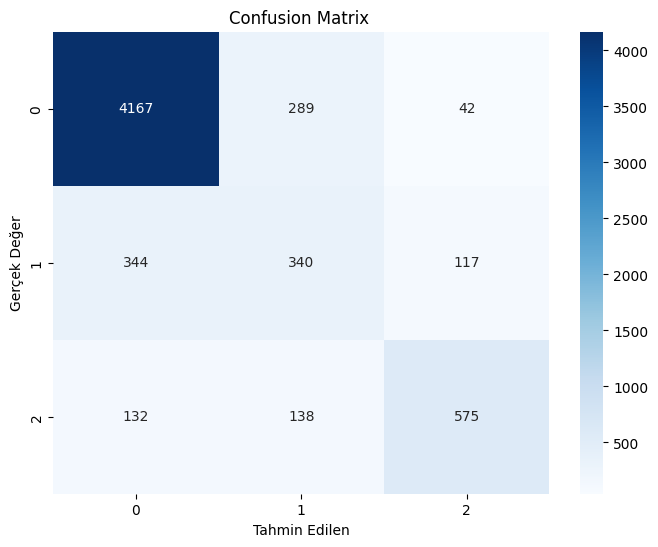

In [55]:


class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

print("Orijinal Ağırlıklar:", class_weight_dict)

# Sınıf 1 (Arada kalanlar) modelin en çok karıştırdığı sınıf olduğu için
# onun ağırlığını manuel olarak %50 artırıyoruz (1.5 katı).
class_weight_dict[1] = class_weight_dict[1] * 1.5

print("Güncellenmiş Ağırlıklar:", class_weight_dict)

sample_weights_array = y_train.map(class_weight_dict)


xgb_model = xgb.XGBClassifier(
    random_state=42,
    tree_method='hist',
    device='cuda',
    use_label_encoder=False,
    eval_metric='mlogloss',
    max_delta_step=1 ,
    min_child_weight= 1
)

param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2,0.3],
    'n_estimators': [100,150, 200, 300,500],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,
    cv=3,
    scoring='f1_weighted',
    verbose=2,
    n_jobs=1,
    random_state=42
)

print("\nYeni ayarlarla eğitim başlıyor...")
random_search.fit(x_train, y_train, sample_weight=sample_weights_array)

print("Eğitim tamamlandı.")
print("En iyi parametreler:", random_search.best_params_)


best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Görselleştirme
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.title('Confusion Matrix ')
plt.show()

#Parametreleri değiştirelim ve class 1 in ağırlığını daha da artıralım
max_depth → Ağaç ne kadar derine insin

learning_rate → Her adımda ne kadar hızlı öğrensin

n_estimators → Kaç ağaç kurulsun

subsample → Her ağaç kaç % veri görsün

colsample_bytree → Her ağaç kaç % özellik görsün

min_child_weight → Bölünme yapmadan önce kaç tane örnek olsun

gamma → Yeni bir dal açmak için minimum fayda ne kadar olsun

'max_depth': [8, 10, 12],
    'learning_rate': [0.03, 0.05, 0.07],
    'n_estimators': [600, 800, 1000],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9],
    'min_child_weight': [1, 2],
    'gamma': [0, 0.1]

Orijinal Ağırlıklar: {np.int64(0): np.float64(0.45391328620805727), np.int64(1): np.float64(2.650939777522056), np.int64(2): np.float64(2.3825899590605473)}
Güncellenmiş Ağırlıklar: {np.int64(0): np.float64(0.45391328620805727), np.int64(1): np.float64(6.627349443805139), np.int64(2): np.float64(2.3825899590605473)}

Yeni ayarlarla eğitim başlıyor...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.07, max_depth=12, min_child_weight=1, n_estimators=1000, subsample=0.7; total time=   9.6s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.07, max_depth=12, min_child_weight=1, n_estimators=1000, subsample=0.7; total time=   9.5s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.07, max_depth=12, min_child_weight=1, n_estimators=1000, subsample=0.7; total time=   9.6s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.07, max_depth=8, min_child_weight=1, n_estimators=800, subsample=0.9; total time=  

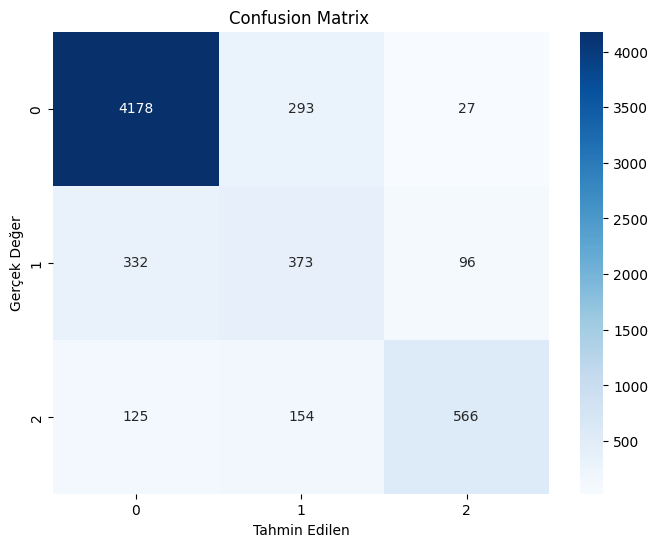

In [56]:


class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

print("Orijinal Ağırlıklar:", class_weight_dict)

# Sınıf 1 (Arada kalanlar) modelin en çok karıştırdığı sınıf olduğu için
# onun ağırlığını manuel olarak %50 artırıyoruz (1.5 katı).
class_weight_dict[1] = class_weight_dict[1] * 2.5

print("Güncellenmiş Ağırlıklar:", class_weight_dict)

sample_weights_array = y_train.map(class_weight_dict)


xgb_model = xgb.XGBClassifier(
    random_state=42,
    tree_method='hist',
    device='cuda',
    use_label_encoder=False,
    eval_metric='mlogloss',
    max_delta_step=1 ,
    min_child_weight= 1
)

param_grid = {
    'max_depth': [8, 10, 12],
    'learning_rate': [0.03, 0.05, 0.07],
    'n_estimators': [600, 800, 1000],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9],
    'min_child_weight': [1, 2],
    'gamma': [0, 0.1]
}


random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,
    cv=3,
    scoring='f1_weighted',
    verbose=2,
    n_jobs=1,
    random_state=42
)

print("\nYeni ayarlarla eğitim başlıyor...")
random_search.fit(x_train, y_train, sample_weight=sample_weights_array)

print("Eğitim tamamlandı.")
print("En iyi parametreler:", random_search.best_params_)


best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Görselleştirme
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.title('Confusion Matrix ')
plt.show()

#Daha da kötü oldu recall değeri baya bir arttı ama bu sefer de precision çok azaldı

Orijinal Ağırlıklar: {np.int64(0): np.float64(0.45391328620805727), np.int64(1): np.float64(2.650939777522056), np.int64(2): np.float64(2.3825899590605473)}
Güncellenmiş Ağırlıklar: {np.int64(0): np.float64(0.45391328620805727), np.int64(1): np.float64(7.952819332566167), np.int64(2): np.float64(2.3825899590605473)}

Recall odaklı eğitim başlıyor...
Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=2, n_estimators=800, subsample=0.9; total time=   6.4s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=2, n_estimators=800, subsample=0.9; total time=   6.4s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=2, n_estimators=800, subsample=0.9; total time=   6.4s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.03, max_depth=10, min_child_weight=1, n_estimators=600, subsample=0.9; total time=   8.7s
[CV] E

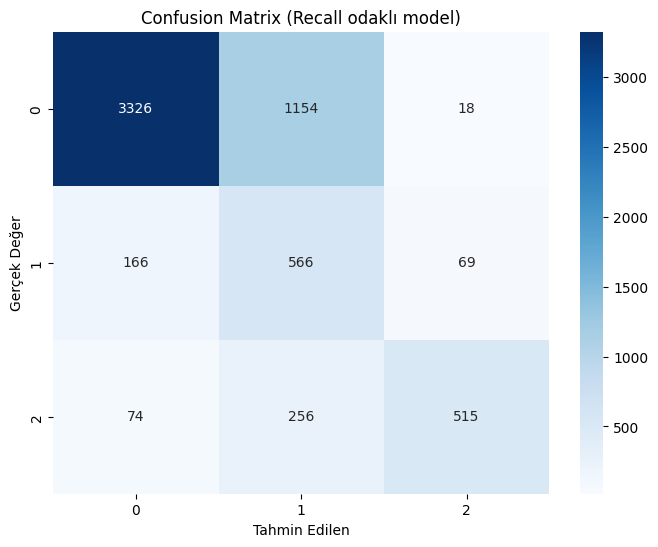

In [60]:

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

print("Orijinal Ağırlıklar:", class_weight_dict)

# Class 1 ağırlığını agresif artırıyoruz
class_weight_dict[1] = class_weight_dict[1] * 3.0

print("Güncellenmiş Ağırlıklar:", class_weight_dict)

sample_weights_array = y_train.map(class_weight_dict)
def recall_class1(y_true, y_pred):
    # Sadece sınıf 1’in recall’ını hesapla
    return recall_score(y_true, y_pred, labels=[1], average='macro')

recall_scorer = make_scorer(recall_class1, greater_is_better=True)
xgb_model = xgb.XGBClassifier(
    random_state=42,
    tree_method='hist',
    device='cuda',
    use_label_encoder=False,
    eval_metric='mlogloss',
    max_delta_step=1,
    # min_child_weight'i gridde arayacağız
)

param_grid = {
    'max_depth': [8, 10, 12],
    'learning_rate': [0.03, 0.05],
    'n_estimators': [600, 800, 1000],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.7, 0.9],
    'min_child_weight': [1, 2],
    'gamma': [0, 0.1]
}


random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=15,          # istersen 10–15 tut
    cv=3,
    scoring=recall_scorer,   # BURASI ÖNEMLİ
    verbose=2,
    n_jobs=1,
    random_state=42
)

print("\nRecall odaklı eğitim başlıyor...")
random_search.fit(x_train, y_train, sample_weight=sample_weights_array)

print("Eğitim tamamlandı.")
print("En iyi parametreler:", random_search.best_params_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.title('Confusion Matrix (Recall odaklı model)')
plt.show()